
#Introdução

O projeto consiste em encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning, escolhi como tema colonização espacial. A ideia do projeto é treinar e testar um modelo de machine learning para identificar e classificar pelo método de máquina de vetor de suporte (*support vector machine*) de exoplanetas com base em suas características astrofísicas. De forma que um centro de estudos possa utilizar o modelo para filtrar corpos celestes com base em sua probabilidade de serem Exoplanetas. Uma evolução deste projeto seria alimentar o modelo com dados que possam indicar se os Exoplanetas confirmados pertencem ou não a Zona Habitável, que pode indicar que o Exoplaneta é habitável e possui condições ideais para a vida e colonização.

A base de dados será o DataSet [Kepler Exoplanet Search Results](https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results)

#Contexto

O Observatório Espacial Kepler é um satélite construído pela NASA que foi lançado em 2009. O telescópio tem como missão principal buscar por exoplanetas em sistemas estelares além do nosso, com o objetivo final de possivelmente encontrar outros planetas habitáveis além do nosso próprio. A missão original foi encerrada em 2013 devido a falhas mecânicas, mas o telescópio continua funcional desde 2014 em uma missão estendida chamada "K2".

Até maio de 2016, o Kepler havia verificado 1284 novos exoplanetas. A partir de outubro de 2017, existem mais de 3000 exoplanetas confirmados no total (usando todos os métodos de detecção, incluindo métodos terrestres). O telescópio ainda está ativo e continua coletando novos dados em sua missão estendida.

##Exoplaneta:

Um exoplaneta é um planeta que orbita uma estrela fora do nosso sistema solar.

##A zona habitável:

Também chamada de "zona Goldilocks," é uma faixa orbital ao redor de uma estrela onde as condições são adequadas para a existência de água líquida na superfície de um planeta. A presença de água líquida é um dos principais fatores considerados na busca por lugares potencialmente habitáveis no universo. Está na zona habitável que a temperatura é adequada para a vida como a conhecemos.

##KOI (Kepler Object of Interest):

No contexto do conjunto de dados "Kepler Exoplanet Search Results", um KOI (Kepler Object of Interest) se refere a um objeto de interesse observado pelo telescópio espacial Kepler. Esses objetos são inicialmente identificados como candidatos a exoplanetas e são submetidos a análises adicionais para confirmar se realmente são exoplanetas ou não.

As principais características que devemos analisar para avaliar se um exoplaneta pertence a zona habitável são: o Periodo orbital, Tamanho, fluxo de irradiação, temperatura efetiva

##Período Orbital (Orbital Period):

O tempo que um exoplaneta leva para completar uma órbita ao redor de sua estrela hospedeira. Isso afeta a distância média entre o planeta e a estrela, o que, por sua vez, influencia a temperatura do planeta.

##O tamanho do exoplaneta:

Isso pode afetar a capacidade do planeta de reter uma atmosfera e, portanto, sua capacidade de suportar água líquida na superfície.

##Fluxo de Irradiação (Stellar Flux):

A quantidade de energia que um exoplaneta recebe de sua estrela hospedeira. Isso está diretamente relacionado à temperatura do planeta e à possibilidade de água líquida.

##Temperatura Efetiva (Effective Temperature):

A temperatura média de equilíbrio do exoplaneta, considerando a radiação que ele recebe de sua estrela hospedeira. A temperatura efetiva está relacionada à capacidade do planeta de manter água líquida em sua superfície.

##Massa da Estrela Hospedeira (Host Star Mass):
A massa da estrela hospedeira também pode influenciar as condições em torno dos exoplanetas.

#Dados

Este conjunto de dados é um registro cumulativo de todos os "objetos de interesse" observados pelo Kepler - basicamente, todos os aproximadamente 10.000 candidatos a exoplanetas nos quais o Kepler realizou observações.

Este conjunto de dados possui um extenso dicionário de dados, que pode ser acessado [aqui](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

As colunas de destaque para esse projeto são:

**kepoi_name:** Um KOI é um alvo identificado pelo Projeto Kepler que exibe pelo menos uma sequência de trânsito semelhante dentro da fotometria de séries temporais do Kepler que parece ter origem astrofísica e inicialmente é consistente com uma hipótese de trânsito planetário.

**kepler_name:** Número do Kepler no formato "Kepler-N," mais uma letra minúscula que identifica o planeta. Em geral, esses números são mais fáceis de lembrar do que as designações correspondentes KOI ou KIC/KepID e têm a intenção de indicar claramente uma classe de objetos que foram confirmados ou validados como planetas, um passo além da designação de candidato a planeta.

**koi_disposition:** A categoria deste KOI a partir do Arquivo de Exoplanetas. Os valores atuais são CANDIDATE (Candidato), FALSE POSITIVE (Falso Positivo), NOT DISPOSITIONED (Não Disposto) ou CONFIRMED (Confirmado). Todos os KOIs marcados como CONFIRMED também estão listados na tabela de Planetas Confirmados do Arquivo de Exoplanetas. As designações de CANDIDATE, FALSE POSITIVE e NOT DISPOSITIONED são obtidas a partir da Disposition Using Kepler Data (Disposição Usando Dados do Kepler).

**koi_pdisposition:** A bandeira de pipeline que designa a explicação física mais provável do KOI (Kepler Object of Interest). Valores típicos são FALSE POSITIVE (Falso Positivo), NOT DISPOSITIONED (Não Disposto) e CANDIDATE (Candidato). O valor desta bandeira pode mudar ao longo do tempo à medida que a avaliação dos KOIs avança para níveis mais profundos de análise usando dados de pixels e curvas de luz do Kepler ou observações de acompanhamento. O valor "not dispositioned" corresponde a objetos para os quais os testes de disposição ainda não foram concluídos. Um falso positivo falhou em pelo menos um dos

**koi_score:** Um valor entre 0 e 1 que indica a confiança na disposição do KOI (Kepler Object of Interest). Para CANDIDATEs (Candidatos), um valor mais alto indica mais confiança em sua disposição, enquanto para FALSE POSITIVEs (Falsos Positivos), um valor mais alto indica menos confiança nessa disposição. O valor é calculado a

Este conjunto de dados foi publicado como está pela NASA. Você pode acessar a tabela original [aqui](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi) . Outros dados da missão Kepler estão disponíveis na mesma fonte.


[aqui](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi)

In [ ]:
# importando as principais Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/APRENDIZAGEM DE MÁQUINAS - AER0058/cumulative.csv')

In [ ]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
df.tail()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [ ]:
#verificando as principais informações do meu data set, como total de dados e tipos de dados de todas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [ ]:
#Vrificar dados duplicados
df.duplicated().sum()

0

In [ ]:
#verificar dados faltantes
valores_ausentes = df.isnull().sum()

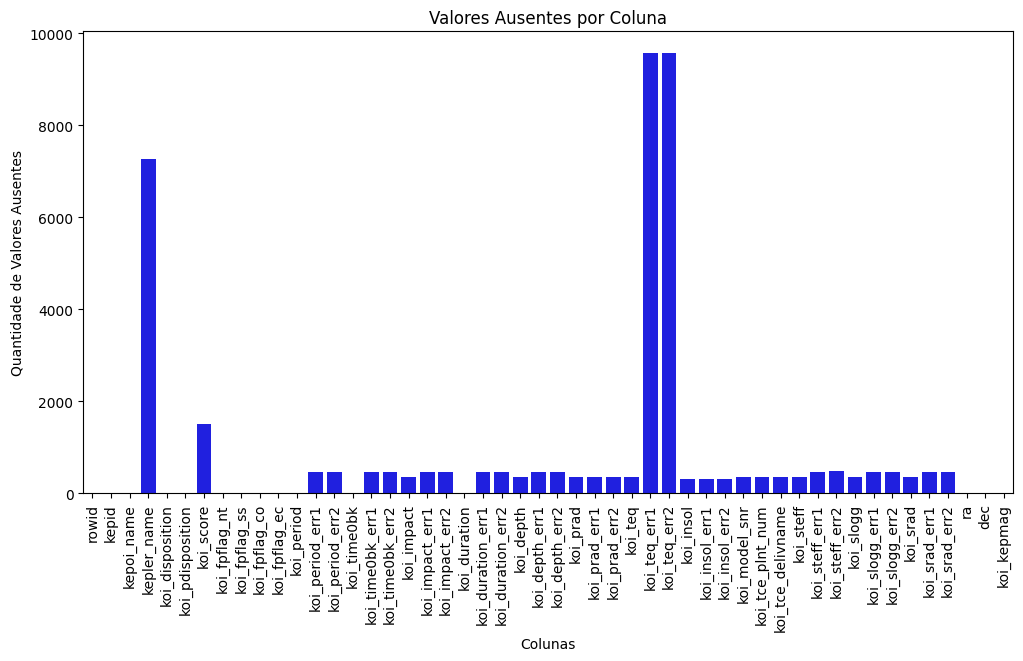

In [ ]:
#coluna de valores ausentes

sns.set_style()
plt.figure(figsize=(12, 6))
sns.barplot(x=valores_ausentes.index, y=valores_ausentes, color='blue')
plt.title('Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Ausentes')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

As colunas kepoi_name, koi_teq_err1 e koi_teq_err2 possui uma quantidade signicativa de dados ausentes(mais de 60%) e portantanto devem ser eliminadas dos nossos dados para não comprometer a qualidade do nosso modeo.

#Limpeza

Como pode-se observar, existem muitos dados faltantes na Base de Dados. Por isso iremos limpar os dados para manter apenas as colunas mais relevantes para o modelo de aprendizagem e simultâneamente renomealas em um novo DataFrame, para tornar mais claro o significado de cada uma delas durante a análise.

Exitem muitas colunas que não são, a priore, do nosso escopo de interesse, e para isso iremos criar um novo DataFrame apenas com as colunas de interesse e renomea-las para facilitar o tratamento dos dados.

As colunas que iremos eliminar serão do tipo objeto, exceto a variável alvo resposta do nosso classificador (KOI).

In [ ]:
exoplanets = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name',
                     'koi_pdisposition', 'koi_score', 'koi_tce_delivname',
                     'koi_teq_err1', 'koi_teq_err2'], axis=1)

In [ ]:
#verificando dados ausentes apos eliminar algumas colunas
exoplanets.isnull().sum()

,0
koi_disposition,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0
koi_period,0
koi_period_err1,454
koi_period_err2,454
koi_time0bk,0
koi_time0bk_err1,454


In [ ]:
#verificar a quantidade de dados de cada varíavel resposta
exoplanets.koi_disposition.value_counts()

,count
koi_disposition,
FALSE POSITIVE,5023
CONFIRMED,2293
CANDIDATE,2248


In [ ]:
#total de dados
exoplanets.shape

(9564, 41)

In [ ]:
exoplanets.isna(  ).sum()

,0
koi_disposition,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0
koi_period,0
koi_period_err1,454
koi_period_err2,454
koi_time0bk,0
koi_time0bk_err1,454


#Balanceamento

Nesta etapa poderia ser feito um balaceamento dos dados da varivável resposta, já que eles possuem valores diferentes. Não iremos realizar este processo, mas caso fosse realizada, era necessário reduzir o tamanho de dados de forma aleatoria da duas maiores amostras e e deixar as 3 variáveis respostas do meu tamanho.

In [ ]:
#Dividir meus dados em preditoras e target
pred = exoplanets.drop('koi_disposition', axis=1)
target = exoplanets.koi_disposition

In [ ]:
#criando modelo sem o comando imputer e StandardScaler. e avaliando o resultado
#predT = exoplanets.drop('koi_disposition', axis=1)
#targetT = exoplanets.koi_disposition
#apagar dados faltoso do preditor
#predT = predT.dropna()
#targetT = targetT[predT.index]

#modelTest = SVC(kernel = 'rbf')
#modelTest.fit(predT, targetT)

#Xt_test, Xt_train, yt_test, yt_train = train_test_split(pred, target, test_size=0.2, random_state=42, stratify=exoplanets.koi_disposition)

#y_pred = modelTest.predict(Xt_test)

#accuracy_test = accuracy_score(yt_test, y_pred)
#print("Acurácia do modelo:", accuracy_test)
#print(classification_report(yt_test, y_pred))
#print(confusion_matrix(yt_test, y_pred))

#Processamento dos dados

Ao lidar com conjuntos de dados grandes, é quase inevitável encontrar valores faltantes. Lidar com dados faltantes de forma eficiente é um passo fundamental na jornada de pré-processamento de dados.

##Comando Imputer

Antes de mergulharmos nos "como fazer", vamos primeiro entender o que é um Imputer. Basicamente, um imputer é um estimador que preenche valores faltantes em seu conjunto de dados. Para dados numéricos, ele utiliza estratégias como média, mediana ou constante, enquanto para dados categóricos, ele usa o valor mais frequente ou uma constante. Além disso, você pode treinar seu modelo para prever os valores faltantes, dependendo da complexidade dos seus dados e dos recursos disponíveis.

Para o nosso projeto em quetão iremos utilizar a Estrategia da média.

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming 'pred' is your feature DataFrame and 'target' is your target Series
# Before scaling the data, impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
pred = imputer.fit_transform(pred)

##StandardScaler

Quando aplicamos o StandardScaler aos dados, ele faz uso da distribuição normal e, portanto, transforma cada valor nos dados de forma que a média dos dados padronizados seja zero e o desvio padrão seja igual a um. Essa transformação garante que os dados estejam em uma escala comum, o que é útil para muitos algoritmos de aprendizado de máquina, especialmente aqueles que são sensíveis à escala dos atributos.

O objetivo de utilizar dessa distribuição para Machine Learning é de simplificar o processo de reconhecimento dos dados pela máquina evitando problemas como Bias (algoritmo enviesado), além de prevenir falhas de sobreajuste e subajuste (quando o modelo se ajusta demais aos dados e não generaliza bem futuros novos dados, ou quando ele não se ajusta bem aos dados, respectivamente)

In [ ]:
from sklearn.preprocessing import StandardScaler # Importing the necessary class
scaler = StandardScaler()
pred = scaler.fit_transform(pred)

Como a proposta do projeto e apresentar o modelo de Classificação SVM ou *suport vector machine*. [Documentação](https://scikit-learn.org/stable/api/sklearn.svm.html)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size=0.2, random_state=42, stratify=target)

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.8776790381599582
                precision    recall  f1-score   support

     CANDIDATE       0.80      0.68      0.73       449
     CONFIRMED       0.76      0.85      0.80       459
FALSE POSITIVE       0.97      0.98      0.97      1005

      accuracy                           0.88      1913
     macro avg       0.84      0.84      0.84      1913
  weighted avg       0.88      0.88      0.88      1913



In [ ]:
print(confusion_matrix(y_test, y_pred))


[[304 124  21]
 [ 58 391  10]
 [ 20   1 984]]


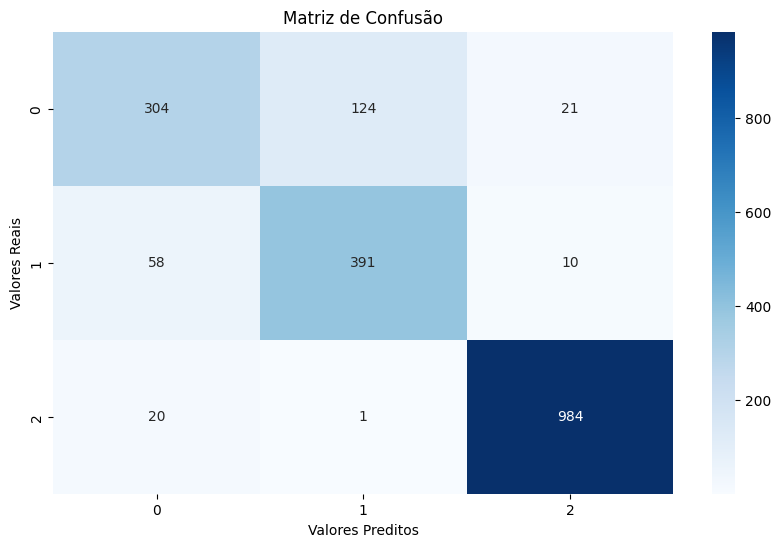

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

#Avaliação

O modelo parece ter uma boa precisão e recall para a classe CONFIRMED, com valore em torno de 0.76 a 0.85, reespectivamente. Para a classe CANDIDATE, a precisão é um pouco maior, em torno de 0.80, e o recall é menor 0.68, indicando que o modelo tem mais dificuldade em identificar corretamente essa classe. Já a clase FALSE POSITIVE obteeve melhor desempenho com 0.97 de precisão e 0.98 de recall. De forma geral nosso modelo apresenta já apresenta um bom desempenho, mas existem alguns testes e melhorias que posso experimentar para verificar se ele consegue resultados ainda melhores, como por exemplo o ajuste de hiperparâmetros.

De que modo o modelo pode ajudar na colonização espacial? Através do aprendizado de máquina é possível treinar um modelo matemático a aprender e evoluir seu aprendizado, na medida em que ele seja capaz de realizar predições com base em dados reais. Podemos avaliar essas predições para verificar sua confiabilidade e então dar sequência a pesquisas com base nas predições de um modelo. O que pode acelerar o rítmo da pesquisa espacial, visto que o modelo seleciona com 97% de precisão todos aqueles corpos celestes que não são exoplanetas, ajudando a pesquisa a focar naqueles que são candidatos e especialmente, os que tem chance dentre os candidatos, de serem exoplanetas confirmados. Além disto é possivel evoluir a pesquisa e desvendar qual planeta possui potencial ser habitável, ja que no rol de dados possui dados que podem avaliar esta demostração.






